<a href="https://colab.research.google.com/github/yoosukyeong/Machine_Learning_basic/blob/main/Random_Forest%EB%A1%9C_%EC%A4%91%EA%B3%A0%EC%B0%A8%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/yoosukyeong/Machine_Learning_basic/main/data/car.csv')

In [3]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
data.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


<ipython-input-6-ad3de4389657>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['selling_price'], bins = 100, kde=False)


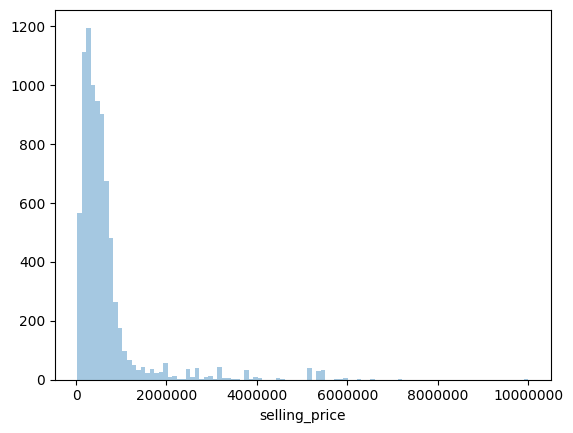

In [6]:
sns.distplot(data['selling_price'], bins = 100, kde=False)
plt.ticklabel_format(style= 'plain', axis = 'both')
plt.show()

In [7]:
data[['engine', 'engine_unit']] = data['engine'].str.split(expand=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
 13  engine_unit    7907 non-null   object 
dtypes: float64(1), int64(3), object(10)
memory usage: 889.1+ KB


In [9]:
data['engine'] = pd.to_numeric(data['engine'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   float64
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
 13  engine_unit    7907 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 889.1+ KB


In [11]:
data['engine_unit'].unique()

array(['CC', nan], dtype=object)

In [12]:
data.drop(['engine_unit'], axis = 1, inplace = True)

In [13]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248.0,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396.0,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298.0,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [14]:
data[['max_power', 'max_power_unit']] = data['max_power'].str.split(expand = True)

In [15]:
data[data['max_power'] == 'bhp']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_power_unit
4933,Maruti Omni CNG,2000,80000,100000,CNG,Individual,Manual,Second Owner,10.9 km/kg,796.0,bhp,NaN,8.0,None


In [16]:
data['max_power'] = data['max_power'].replace('bhp', np.nan)

In [17]:
data[data['max_power'] == 'bhp']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_power_unit


In [18]:
# data['max_power'] = pd.to_numeric(data['max_power'])
data['max_power'] = data['max_power'].astype('float64')

In [19]:
data['max_power_unit'].unique()

array(['bhp', nan, None], dtype=object)

In [20]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_power_unit
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248.0,74.00,190Nm@ 2000rpm,5.0,bhp
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,bhp
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,bhp
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,bhp
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,bhp


In [21]:
data[['mileage', 'mileage_unit']] = data['mileage'].str.split(expand = True)

In [22]:
data['mileage'] = data['mileage'].astype('float64')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            8128 non-null   object 
 1   year            8128 non-null   int64  
 2   selling_price   8128 non-null   int64  
 3   km_driven       8128 non-null   int64  
 4   fuel            8128 non-null   object 
 5   seller_type     8128 non-null   object 
 6   transmission    8128 non-null   object 
 7   owner           8128 non-null   object 
 8   mileage         7907 non-null   float64
 9   engine          7907 non-null   float64
 10  max_power       7912 non-null   float64
 11  torque          7906 non-null   object 
 12  seats           7907 non-null   float64
 13  max_power_unit  7906 non-null   object 
 14  mileage_unit    7907 non-null   object 
dtypes: float64(4), int64(3), object(8)
memory usage: 952.6+ KB


In [24]:
data['mileage_unit'].unique()

array(['kmpl', 'km/kg', nan], dtype=object)

In [25]:
data['mileage_unit'].value_counts()

kmpl     7819
km/kg      88
Name: mileage_unit, dtype: int64

In [26]:
data[data['mileage_unit'] == 'km/kg']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_power_unit,mileage_unit
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.30,1061.0,57.50,"7.8@ 4,500(kgm@ rpm)",5.0,bhp,km/kg
35,Maruti Alto 800 CNG LXI Optional,2019,330000,10000,CNG,Individual,Manual,Second Owner,33.44,796.0,40.30,60Nm@ 3500rpm,4.0,bhp,km/kg
90,Maruti Wagon R LXI LPG BSIV,2010,225000,44000,LPG,Dealer,Manual,First Owner,26.20,998.0,58.20,77Nm@ 3500rpm,5.0,bhp,km/kg
203,Maruti Wagon R LXI CNG,2016,360000,50000,CNG,Individual,Manual,First Owner,26.60,998.0,58.16,77Nm@ 3500rpm,5.0,bhp,km/kg
402,Maruti Eeco CNG 5 Seater AC,2020,409999,35000,CNG,Individual,Manual,First Owner,20.88,1196.0,61.70,85Nm@ 3000rpm,5.0,bhp,km/kg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7308,Maruti Alto Green LXi (CNG),2010,155000,70000,CNG,Individual,Manual,Second Owner,26.83,796.0,38.40,62Nm@ 3000rpm,5.0,bhp,km/kg
7543,Maruti Alto 800 CNG LXI Optional,2019,330000,10000,CNG,Individual,Manual,Second Owner,33.44,796.0,40.30,60Nm@ 3500rpm,4.0,bhp,km/kg
7642,Chevrolet Spark 1.0 LT LPG,2012,300000,70000,LPG,Individual,Manual,First Owner,13.20,995.0,60.20,90.3Nm@ 4200rpm,5.0,bhp,km/kg
7733,Maruti Eeco CNG 5 Seater AC BSIV,2015,380000,20000,CNG,Individual,Manual,First Owner,21.94,1196.0,61.70,85Nm@ 3000rpm,5.0,bhp,km/kg


In [27]:
data['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [28]:
# Petrol 80.43
# Diesel 73.56
# LPG 40.85
# CNG 44.23

In [29]:
# def mile(x):
#     if x['fuel'] == 'Petrol':
#         return x['mileage'] / 80.43
#     elif x['fuel'] == 'Diesel':
#         return x['mileage'] / 73.56
#     elif x['fuel'] == 'LPG':
#         return x['mileage'] / 40.85
#     else:
#         return x['mileage'] / 44.23

In [30]:
def mile(x):
    try:
        if x['fuel'] == 'Petrol':
            return x['mileage'] / 80.43
        elif x['fuel'] == 'Diesel':
            return x['mileage'] / 73.56
        elif x['fuel'] == 'LPG':
            return x['mileage'] / 40.85
        else:
            return x['mileage'] / 44.23
    except Exception as e:
        print(f"Error processing row: {x}, Error: {e}")
        return None


In [31]:
data['mileage'] = data.apply(mile, axis = 1)

In [32]:
data.drop('mileage_unit', axis = 1, inplace = True)

In [33]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_power_unit
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,0.318108,1248.0,74.00,190Nm@ 2000rpm,5.0,bhp
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,0.287384,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,bhp
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,0.220067,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,bhp
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,0.312670,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,bhp
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,0.200174,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,bhp


In [34]:
data['torque'] = data['torque'].str.upper()

In [35]:
def torque_unit(x):
    if 'NM' in str(x):
        return 'NM'
    elif 'KGM' in str(x):
        return 'KGM'

In [36]:
data['torque_unit'] = data['torque'].apply(torque_unit)

In [37]:
data[data['torque_unit'].isna()]['torque'].unique()

array([nan, '250@ 1250-5000RPM', '510@ 1600-2400', '110(11.2)@ 4800',
       '210 / 1900'], dtype=object)

In [38]:
data['torque_unit'].fillna('NM', inplace = True)

In [39]:
def split_num(x):
    x = str(x)
    for index, value in enumerate(x):
        if value not in '0123456789':
            cut = index
            break
    return x[:cut]

In [40]:
data['torque'] = data['torque'].apply(split_num)

In [41]:
# data['torque'] = data['torque'].astype('float64')

In [42]:
for i in data['torque'].unique():
    if i.isnumeric():
        continue
    else:
        x = i

In [43]:
x

''

In [44]:
data['torque'] = data['torque'].replace('', np.NaN)

In [45]:
data['torque'] = data['torque'].astype('float64')

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            8128 non-null   object 
 1   year            8128 non-null   int64  
 2   selling_price   8128 non-null   int64  
 3   km_driven       8128 non-null   int64  
 4   fuel            8128 non-null   object 
 5   seller_type     8128 non-null   object 
 6   transmission    8128 non-null   object 
 7   owner           8128 non-null   object 
 8   mileage         7907 non-null   float64
 9   engine          7907 non-null   float64
 10  max_power       7912 non-null   float64
 11  torque          7906 non-null   float64
 12  seats           7907 non-null   float64
 13  max_power_unit  7906 non-null   object 
 14  torque_unit     8128 non-null   object 
dtypes: float64(5), int64(3), object(7)
memory usage: 952.6+ KB


In [47]:
def torque_trans(x):
    if x['torque_unit'] == 'KGM':
        return x['torque'] * 9.8066
    else:
        return x['torque']

In [48]:
data['torque'] = data.apply(torque_trans, axis = 1)

In [49]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_power_unit,torque_unit
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,0.318108,1248.0,74.00,190.0000,5.0,bhp,NM
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,0.287384,1498.0,103.52,250.0000,5.0,bhp,NM
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,0.220067,1497.0,78.00,117.6792,5.0,bhp,KGM
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,0.312670,1396.0,90.00,215.7452,5.0,bhp,KGM
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,0.200174,1298.0,88.20,107.8726,5.0,bhp,KGM


In [50]:
data.drop('torque_unit', axis = 1, inplace = True)

In [51]:
data.drop('max_power_unit', axis = 1, inplace = True)

In [52]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,0.318108,1248.0,74.00,190.0000,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,0.287384,1498.0,103.52,250.0000,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,0.220067,1497.0,78.00,117.6792,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,0.312670,1396.0,90.00,215.7452,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,0.200174,1298.0,88.20,107.8726,5.0


In [53]:
data['name'] = data['name'].str.split(expand = True)[0]

In [54]:
data['name'].nunique()

32

In [55]:
data.isna().mean()

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          0.027190
engine           0.027190
max_power        0.026575
torque           0.027313
seats            0.027190
dtype: float64

In [56]:
len(data)

8128

In [57]:
len(data.dropna())

7906

In [58]:
data = data.dropna()

In [59]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,0.318108,1248.0,74.00,190.0000,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,0.287384,1498.0,103.52,250.0000,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,0.220067,1497.0,78.00,117.6792,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,0.312670,1396.0,90.00,215.7452,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,0.200174,1298.0,88.20,107.8726,5.0


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   float64
 9   engine         7906 non-null   float64
 10  max_power      7906 non-null   float64
 11  torque         7906 non-null   float64
 12  seats          7906 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 864.7+ KB


In [61]:
for i in ['name', 'fuel', 'seller_type', 'transmission', 'owner']:
    print(i, data[i].nunique())

name 31
fuel 4
seller_type 3
transmission 2
owner 5


In [62]:
data = pd.get_dummies(data, columns = ['name', 'fuel', 'seller_type', 'transmission', 'owner'], drop_first = True)

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('selling_price', axis = 1), data['selling_price'], test_size = 0.2, random_state = 100)

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
rf = RandomForestRegressor(random_state = 100)

In [67]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=100)

In [68]:
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

In [69]:
from sklearn.metrics import mean_squared_error

In [70]:
mean_squared_error(y_train, train_pred, squared = False)

53603.55115849563

In [71]:
mean_squared_error(y_test, test_pred, squared = False)

131075.95288985566

In [72]:
from sklearn.tree import plot_tree

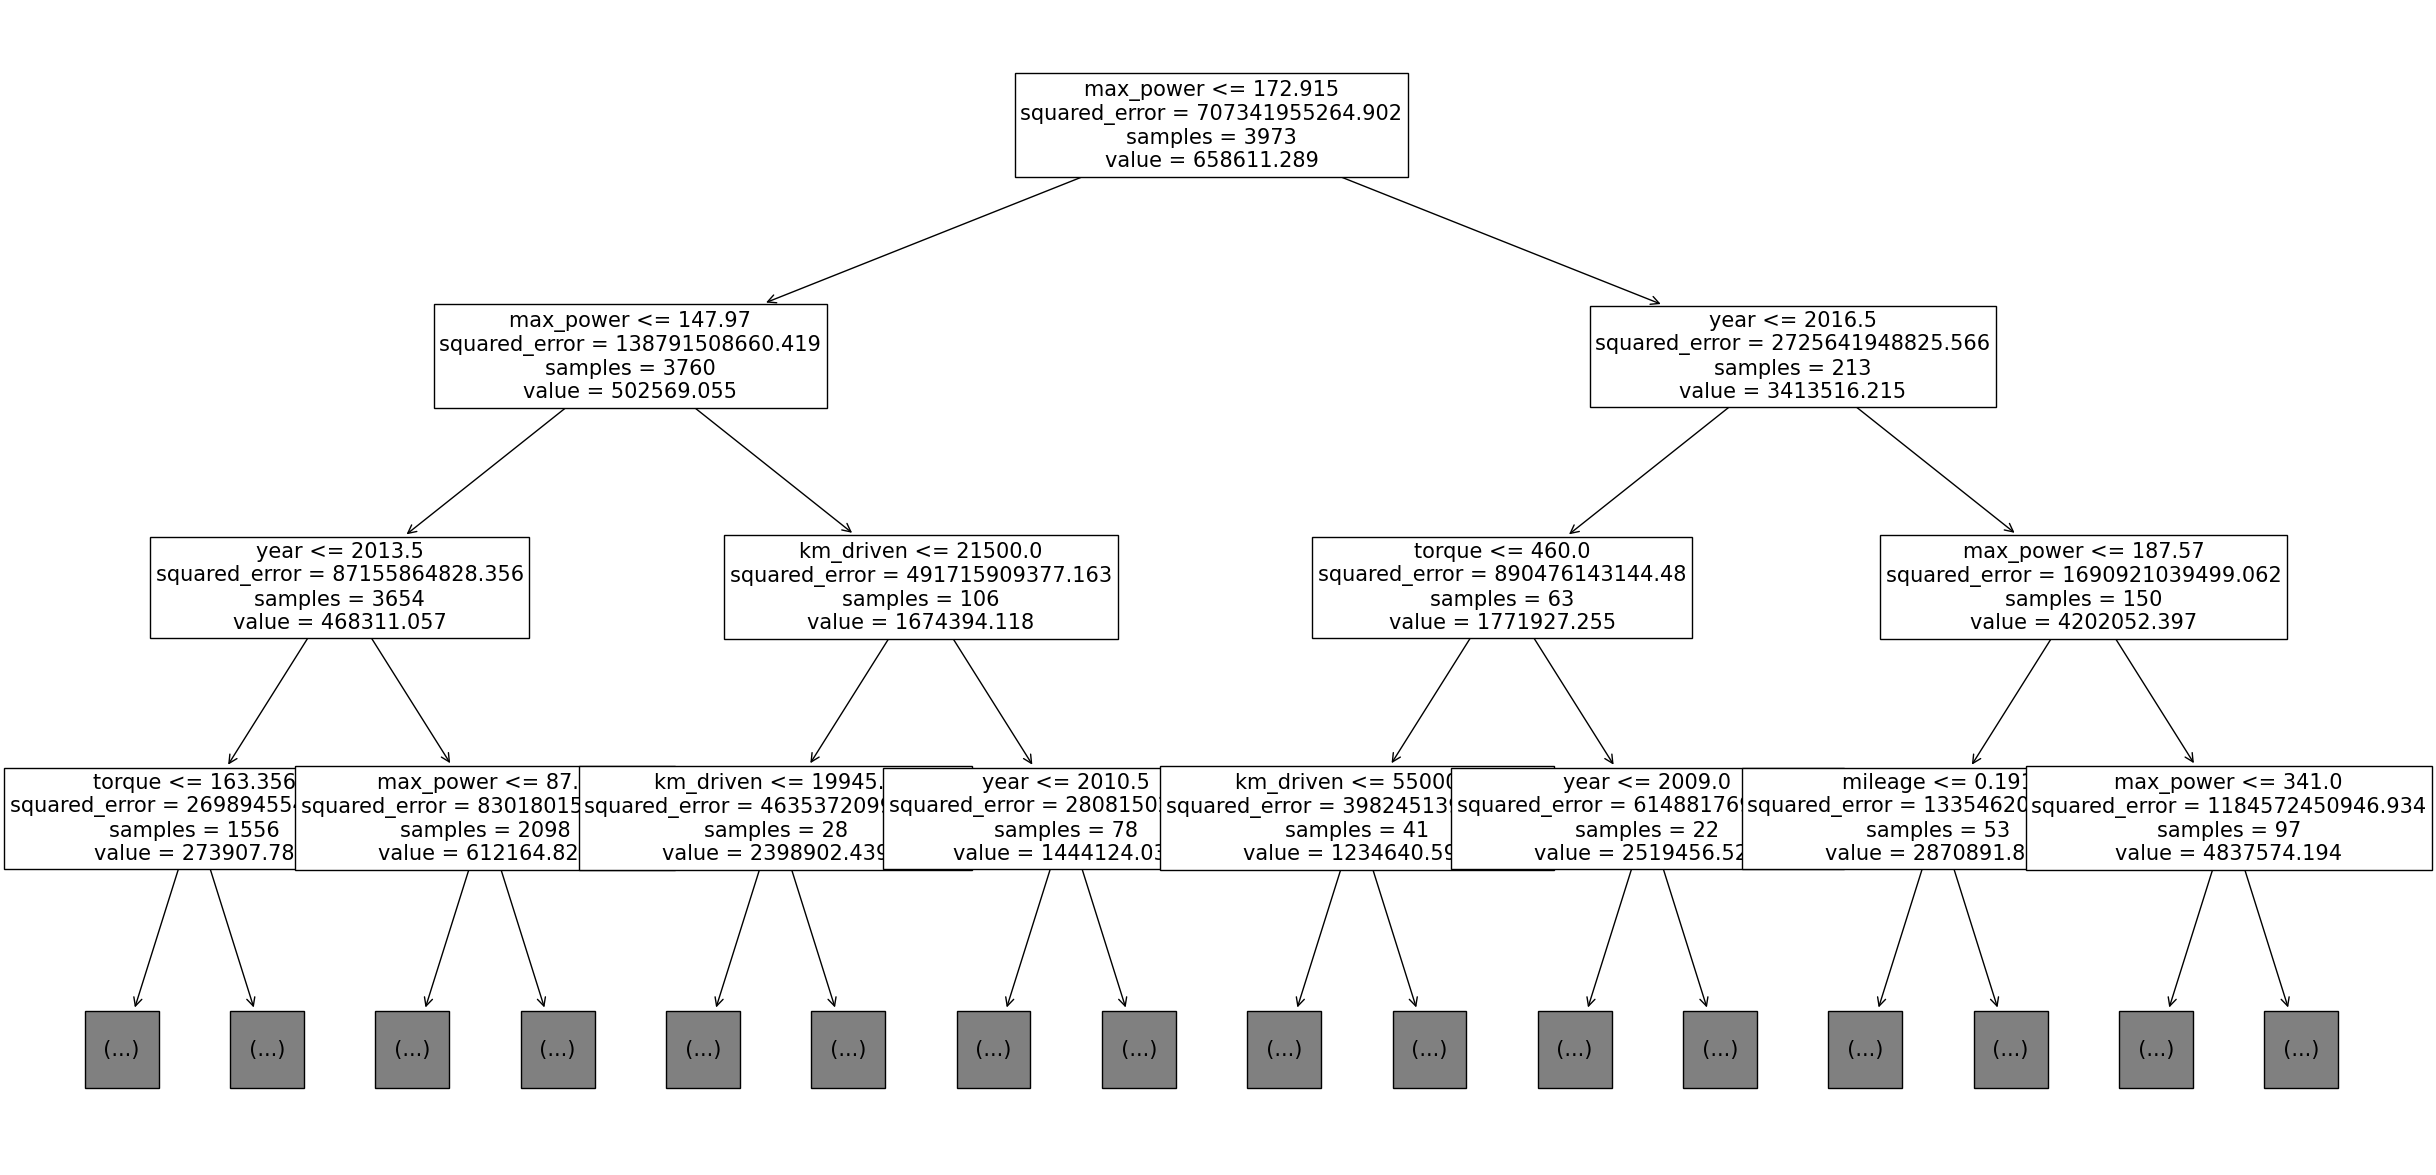

In [73]:
plt.figure(figsize = (30, 15))
plot_tree(rf.estimators_[10], max_depth = 3, fontsize = 15, feature_names = X_train.columns)
plt.show()

In [74]:
round(pd.Series(rf.feature_importances_, index = X_train.columns), 2).sort_values(ascending = False)

max_power                       0.72
year                            0.18
torque                          0.03
km_driven                       0.02
mileage                         0.01
engine                          0.01
seller_type_Individual          0.01
name_Volkswagen                 0.00
name_Mitsubishi                 0.00
name_Nissan                     0.00
name_Opel                       0.00
name_Renault                    0.00
name_Skoda                      0.00
name_Tata                       0.00
name_Toyota                     0.00
fuel_LPG                        0.00
name_Volvo                      0.00
fuel_Diesel                     0.00
name_Maruti                     0.00
fuel_Petrol                     0.00
seller_type_Trustmark Dealer    0.00
transmission_Manual             0.00
owner_Fourth & Above Owner      0.00
owner_Second Owner              0.00
owner_Test Drive Car            0.00
name_Mercedes-Benz              0.00
name_Lexus                      0.00
n

In [75]:
from sklearn.model_selection import KFold

In [76]:
kf = KFold(n_splits = 5)

In [77]:
for i, j in kf.split(data):
    print(i, j)

[1582 1583 1584 ... 7903 7904 7905] [   0    1    2 ... 1579 1580 1581]
[   0    1    2 ... 7903 7904 7905] [1582 1583 1584 ... 3160 3161 3162]
[   0    1    2 ... 7903 7904 7905] [3163 3164 3165 ... 4741 4742 4743]
[   0    1    2 ... 7903 7904 7905] [4744 4745 4746 ... 6322 6323 6324]
[   0    1    2 ... 6322 6323 6324] [6325 6326 6327 ... 7903 7904 7905]


In [78]:
X = data.drop('selling_price', axis = 1)
y = data['selling_price']

In [79]:
train_rmse_list = []
test_rmse_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf_cv = RandomForestRegressor(random_state = 100)
    rf_cv.fit(X_train, y_train)

    train_pred = rf_cv.predict(X_train)
    test_pred = rf_cv.predict(X_test)

    train_rmse = mean_squared_error(y_train, train_pred, squared = False)
    test_rmse = mean_squared_error(y_test, test_pred, squared = False)

    train_rmse_list.append(train_rmse)
    test_rmse_list.append(test_rmse)

In [80]:
train_rmse_list

[50986.75730041469,
 59060.323713414975,
 57868.59538320345,
 55877.76146077998,
 59246.05975273191]

In [81]:
test_rmse_list

[161527.6116761578,
 135190.01630243138,
 122250.03923777258,
 151645.83866742265,
 144341.3683660992]

In [82]:
sum(test_rmse_list) / 5

142990.97484997672

In [83]:
rf = RandomForestRegressor(random_state = 100, max_features= 'sqrt')
rf.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', random_state=100)

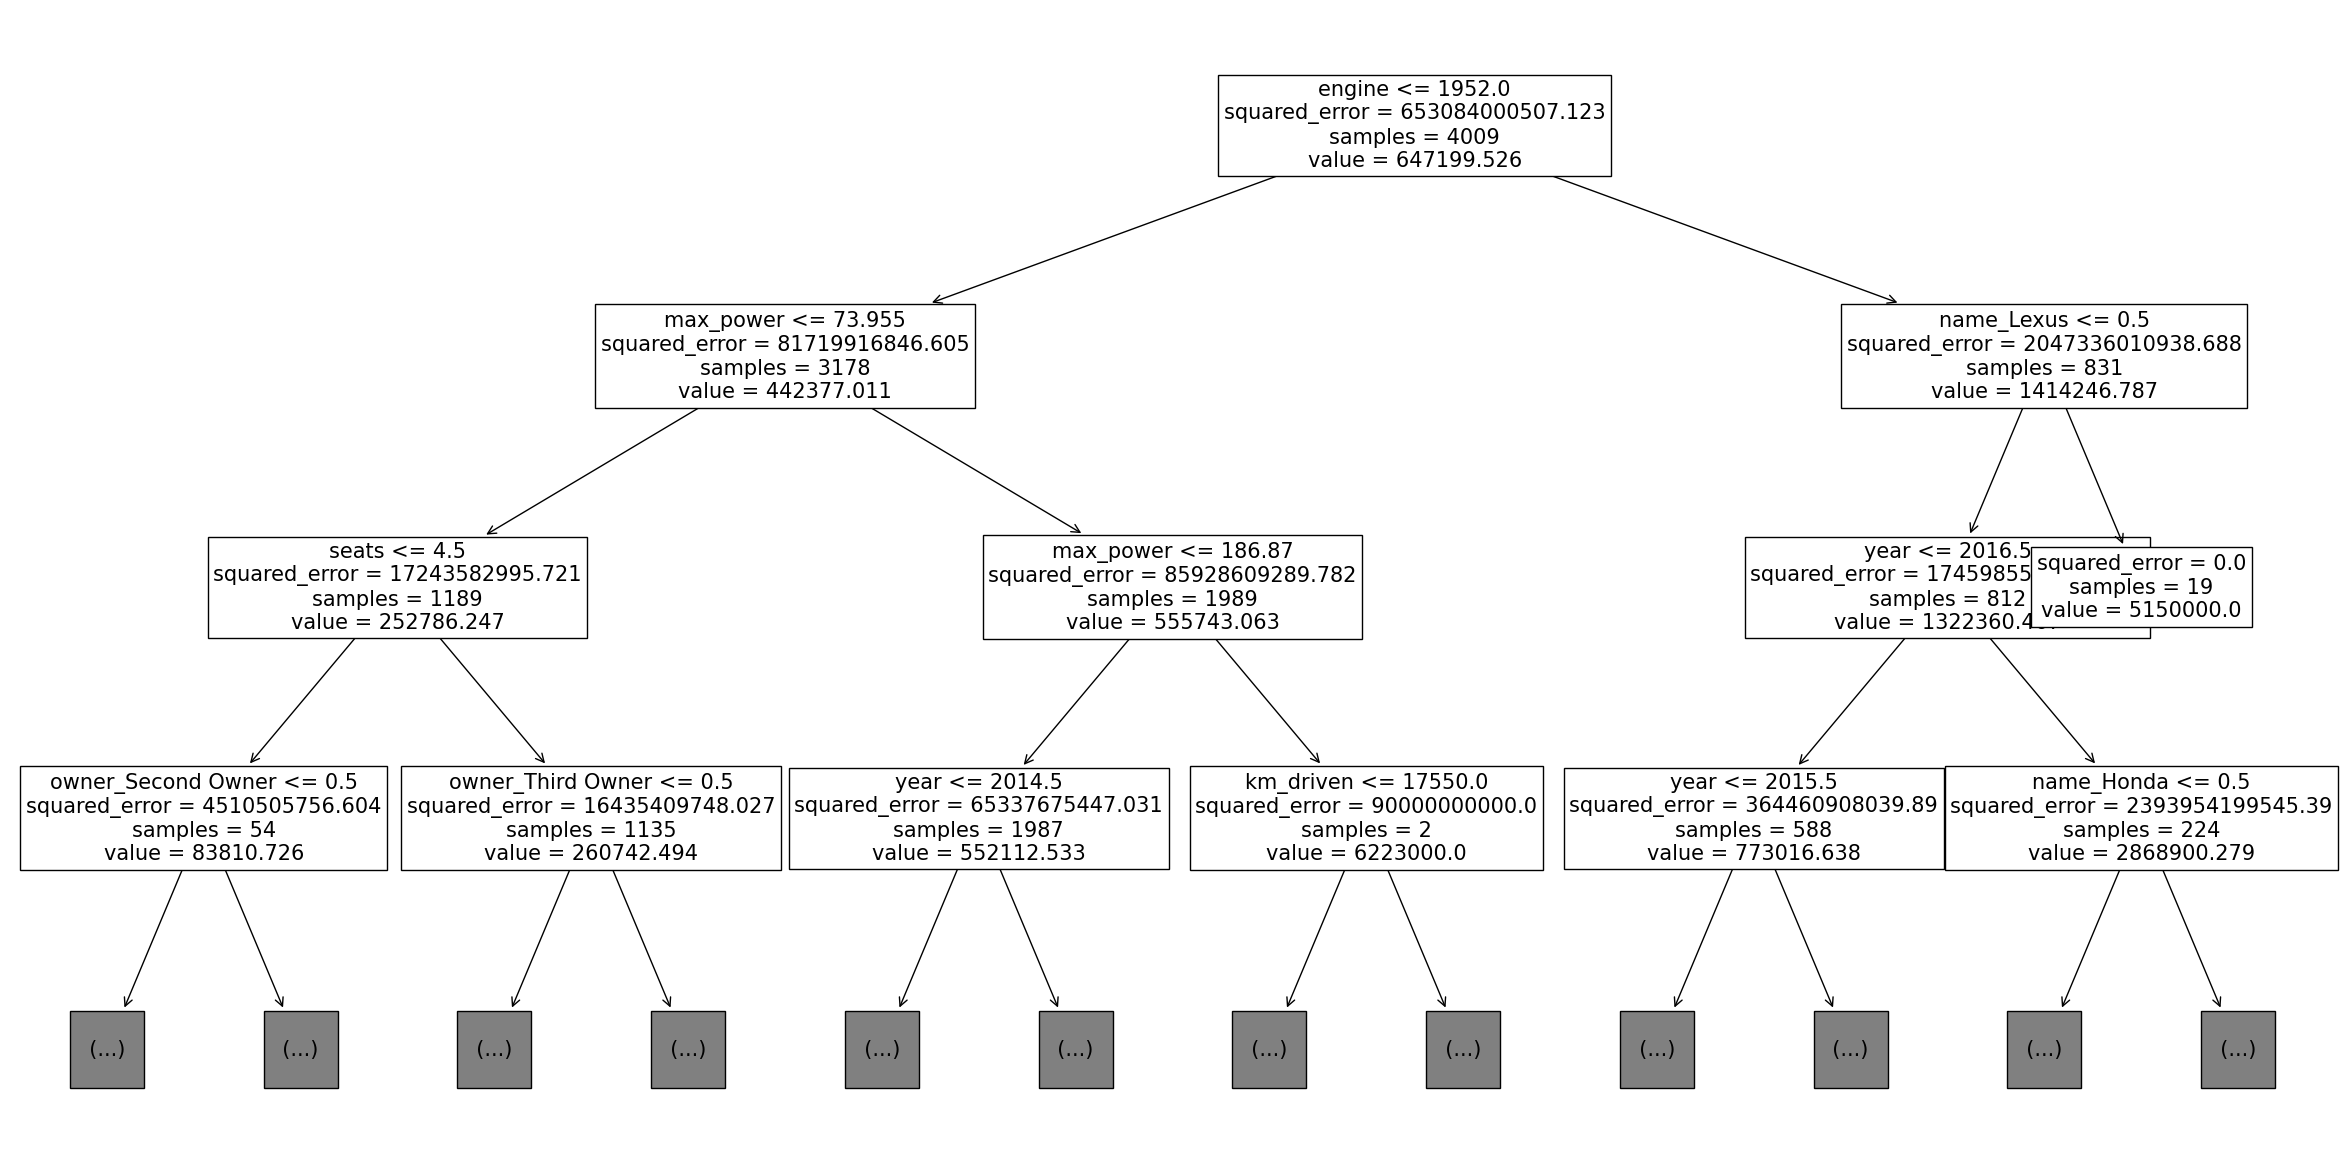

In [84]:
plt.figure(figsize = (30, 15))
plot_tree(rf.estimators_[1], max_depth = 3, fontsize = 15, feature_names = X_train.columns)
plt.show()

In [85]:
train_rmse_list = []
test_rmse_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf_cv = RandomForestRegressor(random_state = 100, max_features = 'sqrt', max_depth = 10, n_estimators = 300, min_samples_split= 3)
    rf_cv.fit(X_train, y_train)

    train_pred = rf_cv.predict(X_train)
    test_pred = rf_cv.predict(X_test)

    train_rmse = mean_squared_error(y_train, train_pred, squared = False)
    test_rmse = mean_squared_error(y_test, test_pred, squared = False)

    train_rmse_list.append(train_rmse)
    test_rmse_list.append(test_rmse)

In [86]:
sum(train_rmse_list) / 5

126241.15322961887

In [87]:
sum(test_rmse_list) / 5

181318.4379504262